In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [3]:
import pandas_datareader as web
from datetime import datetime

In [4]:
tech_list = ["AAPL", "GOOG", "MSFT", "AMZN"]

In [6]:
end = datetime.now()
start = datetime(end.year -1, end.month, end.day) #ちょうど一年前から今日まで

In [7]:
#Yahooからそれぞれの株価情報を取得
for stock in tech_list:
    globals()[stock] = web.DataReader(stock, "yahoo", start, end)

In [27]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,190.657897,186.832818,188.745318,188.715437,3.440408e+07,187.475512
std,20.950701,20.826913,20.888535,20.959315,1.510207e+07,21.205491
min,145.720001,142.000000,143.979996,142.190002,1.251390e+07,142.190002
25%,174.917500,171.755005,173.347504,173.020000,2.356790e+07,171.319050
50%,187.349998,184.845001,186.204994,185.955002,3.179320e+07,184.916672
75%,209.312500,205.632496,207.299999,207.645000,4.092332e+07,206.771034
max,233.470001,229.779999,230.779999,232.070007,9.624670e+07,231.263092


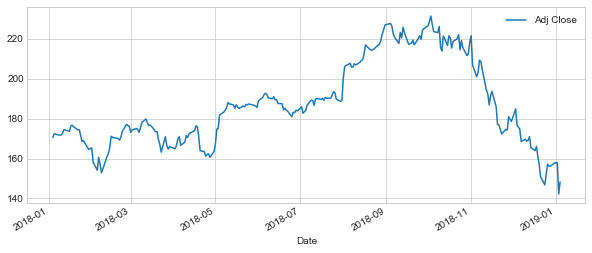

In [36]:
#終値をプロット
AAPL["Adj Close"].plot(legend=True, figsize=(10,4))

In [37]:
#移動平均をプロット
ma_day = [10,20,50]
for ma in ma_day:
    column_name = "MA {}".format(ma)
    AAPL[column_name] = pd.rolling_mean(AAPL["Adj Close"], ma)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  """


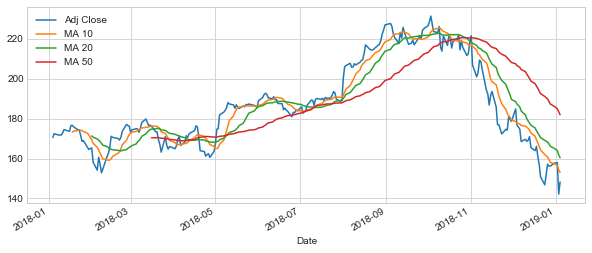

In [38]:
AAPL[["Adj Close", "MA 10", "MA 20", "MA 50"]].plot(subplots=False, figsize=(10,4))

In [39]:
#昨日の終値との比較(-%変化するか)
AAPL["Daily Return"] = AAPL["Adj Close"].pct_change()

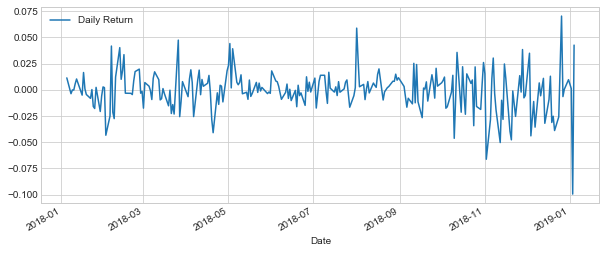

In [42]:
AAPL["Daily Return"].plot(figsize=(10,4), legend=True)

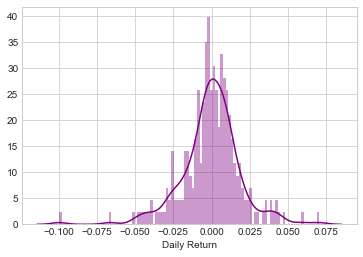

In [44]:
sns.distplot(AAPL["Daily Return"].dropna(), bins=100, color="purple")

In [8]:
#他の企業も同時に比べてみる
closing_df = web.DataReader(["AAPL", "GOOG", "MSFT", "AMZN"], "yahoo", start ,end)["Adj Close"]

In [9]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-01-08,171.771179,1246.869995,1106.939941,86.777763
2018-01-09,171.751465,1252.699951,1106.260010,86.718788
2018-01-10,171.712051,1254.329956,1102.609985,86.325592
2018-01-11,172.687408,1276.680054,1105.520020,86.581169
2018-01-12,174.470642,1305.199951,1122.260010,88.075310


In [10]:
tech_rets = closing_df.pct_change()

In [11]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-01-08,NaN,NaN,NaN,NaN
2018-01-09,-0.000115,0.004676,-0.000614,-0.000680
2018-01-10,-0.000229,0.001301,-0.003299,-0.004534
2018-01-11,0.005680,0.017818,0.002639,0.002961
2018-01-12,0.010326,0.022339,0.015142,0.017257


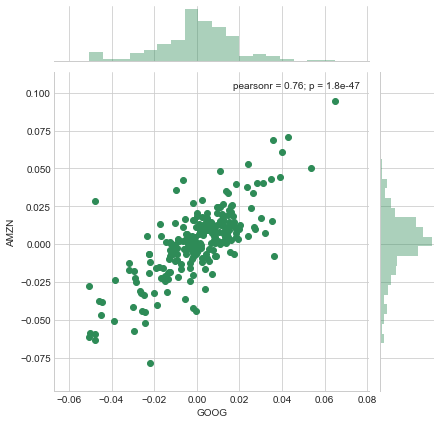

In [15]:
# ２つの会社の終値の相関関係を調べる（p=ピアソンの相関係数）
sns.jointplot("GOOG","AMZN", tech_rets, kind="scatter", color="seagreen")

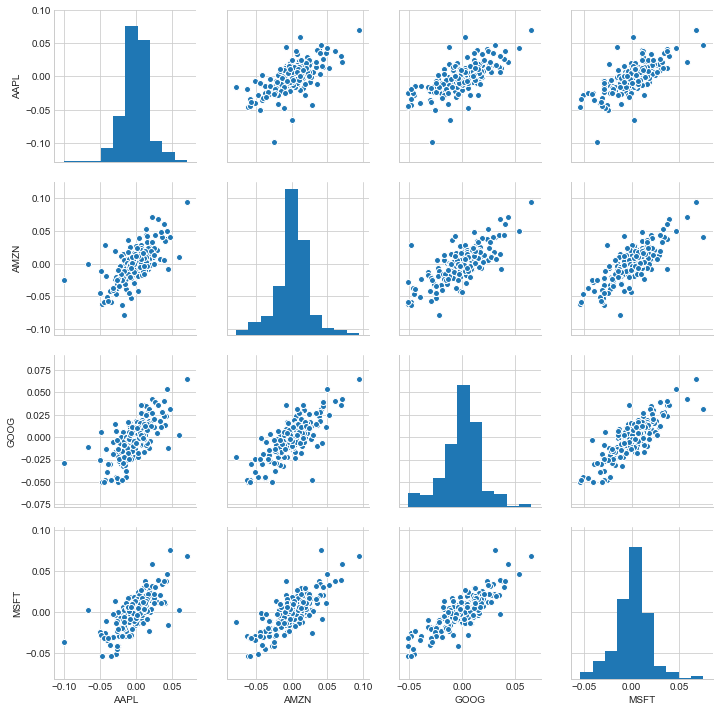

In [17]:
#すべての企業の比較を一度にやりたい
sns.pairplot(tech_rets.dropna())
# どこも正に相関している

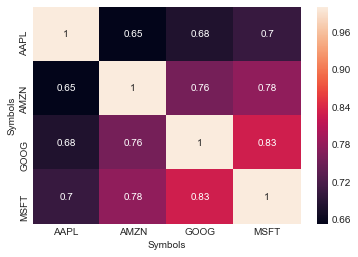

In [20]:
# 相関係数を見たい
sns.heatmap(tech_rets.corr(), annot=True)

In [21]:
# リスク解析（標準偏差を比較する）

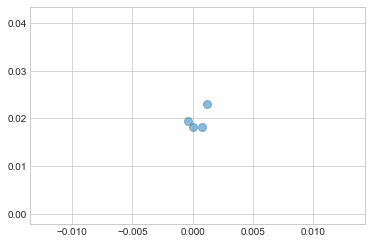

In [22]:
rets = tech_rets.dropna()
plt.scatter(rets.mean(), rets.std(), alpha=0.5, s=np.pi*20)


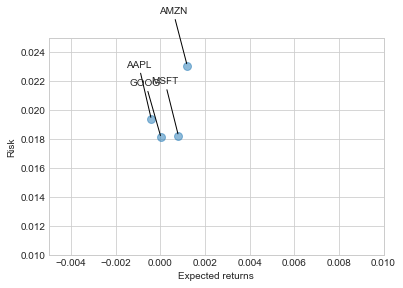

In [24]:
plt.scatter(rets.mean(), rets.std(), alpha=0.5, s=np.pi*20)
plt.ylim([0.01, 0.025])
plt.xlim([-0.005, 0.01])

plt.xlabel("Expected returns")
plt.ylabel("Risk")

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x,y), xytext=(0, 50),
    textcoords = "offset points", ha= "right", va="bottom",
    arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))

In [25]:
# バリュー・アット・リスクを分析してみる
# （実際のデータをもとに、１年間ランダムで取引をさせ、結果どうなったかを分析する）

# 1年を基準にします。
days = 365

# 1日分の差分です。
dt = 1/days

# 日々の変動の平均を計算します。
mu = rets.mean()['GOOG']

# ボラティリティ（volatility：株価の変動の振れ幅）を変動の標準偏差で計算します。
sigma = rets.std()['GOOG']

In [26]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' この関数は、シミュレーションの結果の価格リストを返します。'''
    
    # 戻り値となる価格のリストを返します。
    price = np.zeros(days)
    price[0] = start_price
    # Shock と Driftです。
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # 指定された日数のところまで、計算します。
    for x in range(1,days):
        #  shockを計算します
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Driftを計算します。
        drift[x] = mu * dt
        # これらを使って価格を計算します。
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Text(0.5,1,'Monte Carlo Analysis for Google')

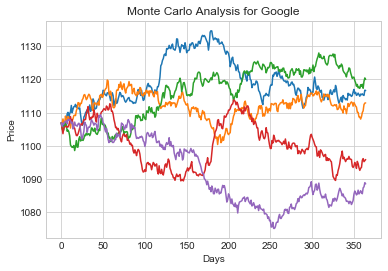

In [28]:
# 最初の終値から始めます。
start_price = GOOG.iloc[0,5]

#　ランダムで５回実践する
for run in range(5):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [29]:
# 1000０万回実践する
runs = 10000

# 結果を保持するarrayです。
simulations = np.zeros(runs)

# これは、表示のオプションです。
np.set_printoptions(threshold=5)

for run in range(runs):    
    # 最終的な値をシミュレーション結果として保持します。
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

(array([1., 0., 0., ..., 0., 0., 1.]),
 array([1030.64012058, 1031.40412595, 1032.16813132, ..., 1181.91318398,
        1182.67718935, 1183.44119472]),
 <a list of 200 Patch objects>)

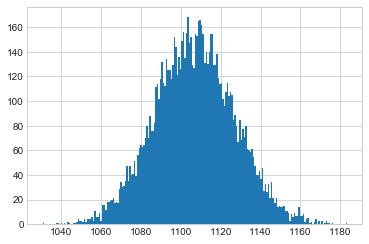

In [30]:
# 10000個の最終的なシミュレーション結果のヒストグラムです。
plt.hist(simulations,bins=200)

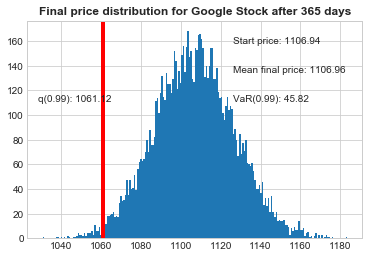

In [31]:
# 最終的な株価のヒストグラムを表示します。
plt.hist(simulations,bins=200)

# 1パーセンタイルの位置を設定します。
q = np.percentile(simulations, 1)

# プロットに追加的な情報を載せます。

# 最初の株価
plt.figtext(0.6, 0.8, s="Start price: {:0.2f}".format(start_price))
# 最終的な株価の平均値
plt.figtext(0.6, 0.7, "Mean final price: {:0.2f}".format(simulations.mean()))

# Value at Risk (信頼区間99%）
plt.figtext(0.6, 0.6, "VaR(0.99): {:0.2f}".format(start_price - q))

# 1パーセンタイル
plt.figtext(0.15, 0.6, "q(0.99): {:0.2f}".format(q))

# 1% クォンタイルに線を描きます
plt.axvline(x=q, linewidth=4, color='r')

# タイトル
plt.title("Final price distribution for Google Stock after {} days".format(days), weight='bold');


# 99%の確率で、1年後４５ドル以上は損をしないことがわかる。